In [135]:
import IPython
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [136]:
data = pd.read_csv("Crop_recommendation.csv")

In [137]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [138]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [139]:
data.shape

(2200, 8)

In [140]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [141]:
data.duplicated().sum()

0

In [142]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [144]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [145]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [146]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [147]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [148]:
crop_summary = pd.pivot_table(data, index = ['label'], aggfunc = 'mean')  

In [149]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [150]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [151]:
import plotly.express as px

In [152]:
fig = px.box(data, y='N', points = "all")

fig.show()

In [153]:
fig = px.box(data, y='P', points = "all")

fig.show()

In [154]:
fig = px.box(data, y='K', points = "all")

fig.show()

In [155]:
fig = px.box(data, y="temperature", points = "all")

fig.show()

In [156]:
fig = px.box(data, y="humidity", points = "all")

fig.show()

In [157]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [158]:
fig = px.box(data, y="ph", points = "all")

fig.show()

In [159]:
fig = px.box(data, y="rainfall", points = "all")

fig.show()

In [160]:
df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()
Q1 = np.percentile(df_boston['rainfall'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_boston['rainfall'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape : ", df_boston.shape)
upper = np.where(df_boston['rainfall'] >= (Q3 + 1.5*IQR))
lower = np.where(df_boston['rainfall'] <= (Q1 - 1.5*IQR))
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
print("New Shape : ", df_boston.shape)

Old Shape :  (2200, 8)
New Shape :  (2101, 8)


In [161]:
data = df_boston

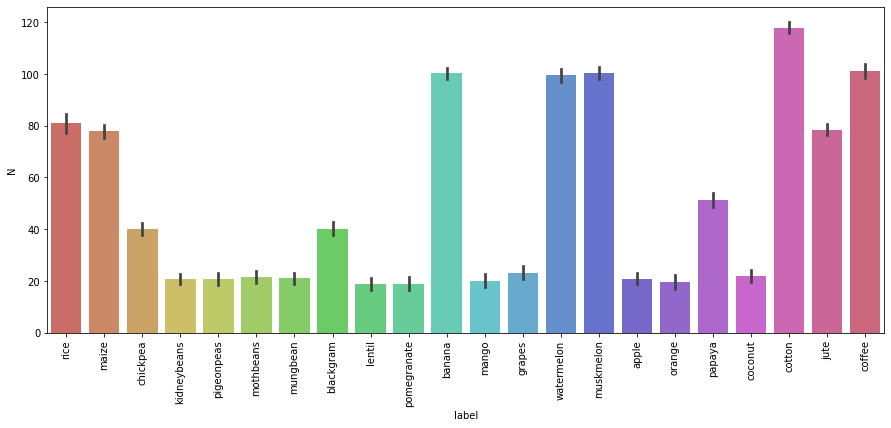

In [162]:
plt.figure(figsize = (15,6))
sns.barplot(y = 'N', x = 'label', data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [163]:
crop_summary_new = data.copy()

In [164]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [165]:
fig1 = px.bar(crop_summary_new, x = 'label', y = 'N')
fig1.show()

In [166]:
fig1 = px.bar(crop_summary_new, x = 'label', y = 'K')
fig1.show()

In [167]:
import random
from IPython.core.display import update_display

In [168]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.237127,-0.139970,0.041633,0.189609,0.099238,0.003231
P,-0.237127,1.000000,0.737806,-0.133415,-0.111730,-0.146018,-0.046656
K,-0.139970,0.737806,1.000000,-0.165188,0.198119,-0.174559,-0.042466
temperature,0.041633,-0.133415,-0.165188,1.000000,0.203789,-0.021339,-0.039570
humidity,0.189609,-0.111730,0.198119,0.203789,1.000000,-0.005955,0.020846
ph,0.099238,-0.146018,-0.174559,-0.021339,-0.005955,1.000000,-0.127166
rainfall,0.003231,-0.046656,-0.042466,-0.039570,0.020846,-0.127166,1.000000


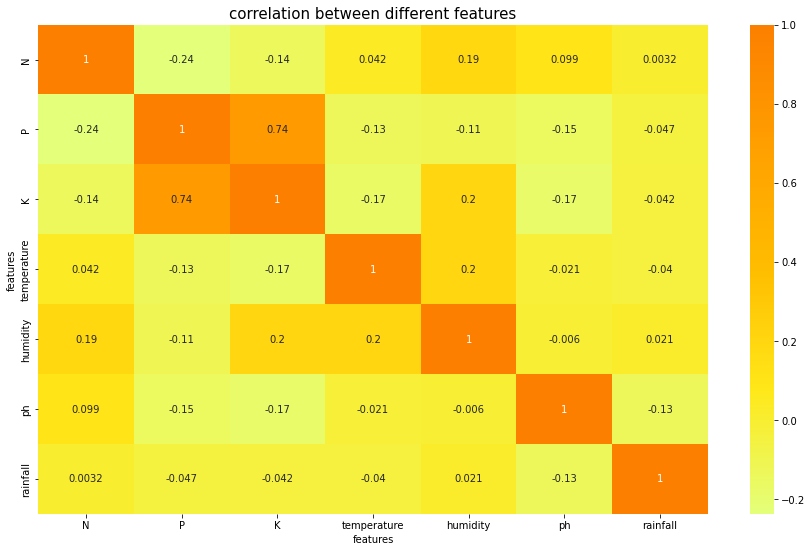

In [169]:
fig, ax = plt.subplots(1, 1, figsize = (15, 9))
sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
ax.set(xlabel = 'features')
ax.set(ylabel = 'features')

plt.title('correlation between different features', fontsize = 15, c = 'black')
plt.show()

In [170]:
x = data.drop('label', axis = 1)
y = data['label']

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, shuffle = True, random_state = 0)

In [172]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 1470, number of used features: 7
[LightGBM] [Info] Start training from score -3.030338
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.103363
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.088325
[LightGBM] [Info] Start training from score -2.949212
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.058911
[LightGBM] [Info] Start training from score -3.088325
[LightGBM] [Info] Start training from score -3.030338
[LightGBM] [Info] Start training from score -3.016352
[LightGBM] [Info] Start training from score -2.949212
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier()

In [173]:
y_pred = model.predict(x_test)

In [174]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print('Lightgbm accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Lightgbm accuracy score : 0.9889


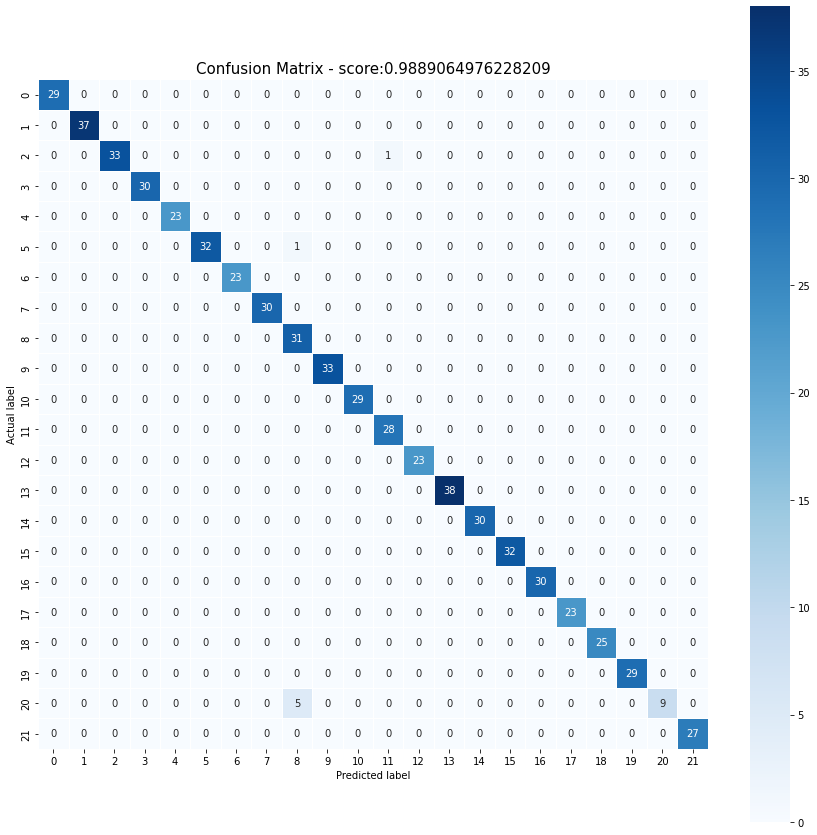

In [175]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      0.97      0.99        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      0.97      0.98        33
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        30
        jute       0.84      1.00      0.91        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       0.97      1.00      0.98        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [177]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [178]:
Classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [179]:
y_pred = Classifier.predict(x_test)

In [180]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Decision Tree Model accuracy score : 0.9905


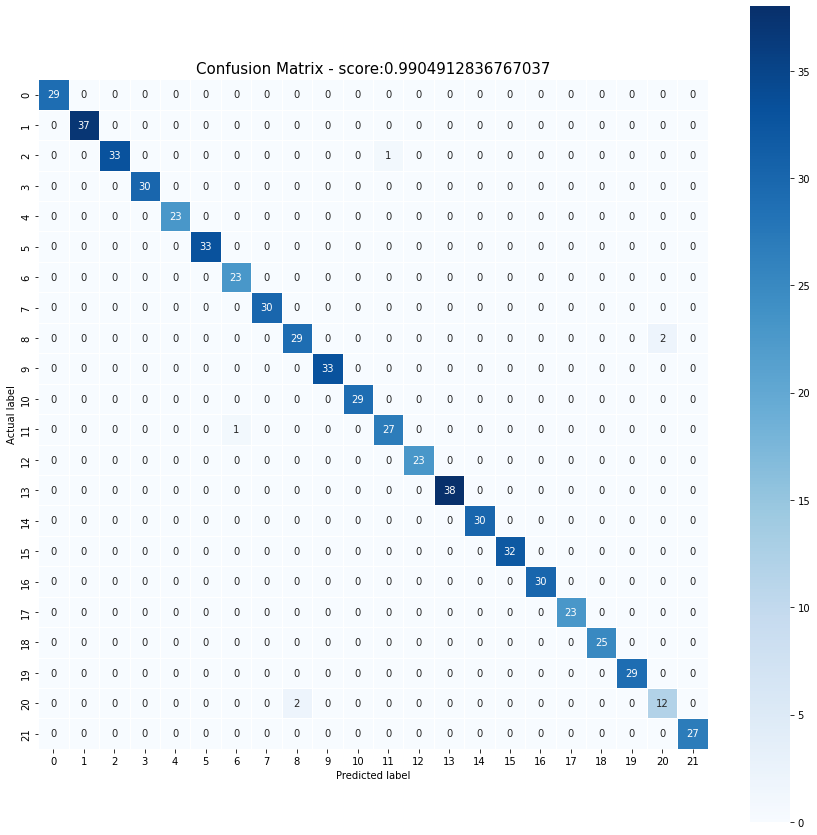

In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      0.97      0.99        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        33
      cotton       0.96      1.00      0.98        23
      grapes       1.00      1.00      1.00        30
        jute       0.94      0.94      0.94        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       0.96      0.96      0.96        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
classifier_lr = LogisticRegression(random_state = 0)

In [185]:
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [186]:
y_pred = classifier_lr.predict(x_test)

In [187]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print('Logistic Regression accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score : 0.9445


In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       0.87      0.79      0.83        34
    chickpea       1.00      1.00      1.00        30
     coconut       0.92      1.00      0.96        23
      coffee       1.00      1.00      1.00        33
      cotton       0.78      0.91      0.84        23
      grapes       1.00      1.00      1.00        30
        jute       0.81      0.94      0.87        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.88      1.00      0.94        29
       maize       0.81      0.79      0.80        28
       mango       1.00      1.00      1.00        23
   mothbeans       0.91      0.76      0.83        38
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       0.95    

In [189]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)

In [190]:
x_train

array([[0.00714286, 0.21428571, 0.145     , ..., 0.37839334, 0.42932325,
        0.3712554 ],
       [0.28571429, 0.07857143, 0.15      , ..., 0.40556353, 0.46224921,
        0.35772095],
       [0.35714286, 0.39285714, 0.21      , ..., 0.91562462, 0.53157839,
        0.37942472],
       ...,
       [0.02142857, 0.41428571, 0.055     , ..., 0.54741533, 0.52235525,
        0.1693669 ],
       [0.26428571, 0.09285714, 0.17      , ..., 0.936181  , 0.45295644,
        0.46435437],
       [0.33571429, 0.29285714, 0.235     , ..., 0.89992445, 0.46508279,
        0.96124244]])

In [191]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [192]:
x_train

array([[-1.30377283, -0.54992056, -0.28050111, ..., -1.07192992,
        -0.23033809, -0.09935887],
       [-0.26143092, -1.11584838, -0.26128334, ..., -0.9684373 ,
         0.04591563, -0.15670824],
       [ 0.00583624,  0.19472132, -0.03067   , ...,  0.97441059,
         0.62759786, -0.06474308],
       ...,
       [-1.2503194 ,  0.28407834, -0.62642111, ..., -0.42811677,
         0.55021432, -0.95481918],
       [-0.34161106, -1.05627703, -0.18441223, ...,  1.05271085,
        -0.0320521 ,  0.29512861],
       [-0.07434391, -0.22227813,  0.06541888, ...,  0.91460788,
         0.06968974,  2.400588  ]])

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.971473851030111
Naive Bayes  with accuracy : 0.9873217115689382
Support Vector Machine  with accuracy : 0.9762282091917591
K-Nearest Neighbors  with accuracy : 0.96513470681458
Decision Tree  with accuracy : 0.9841521394611727
Random Forest  with accuracy : 0.9889064976228209
Bagging  with accuracy : 0.9793977812995246
AdaBoost  with accuracy : 0.18066561014263074
Gradient Boosting  with accuracy : 0.9841521394611727
Extra Trees  with accuracy : 0.8621236133122029


In [194]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)
accuracy_score(y_test,ypred)

0.9889064976228209

In [195]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [196]:
N = 40
P = 30
k = 40
temperature = 40.0
humidity = 20
ph = 30
rainfall = 50

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Sorry are not able to recommend a proper crop for this environment


In [197]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

In [198]:
x_test[0:1]

array([[-0.36833778,  2.13079019,  2.83277888,  2.29136945,  0.43723923,
        -0.38519087, -0.65489457]])

In [199]:
result = Classifier.predict(x_test[0:1])

In [200]:
result

array(['mothbeans'], dtype=object)

In [201]:
y_test[0:1]

1203    grapes
Name: label, dtype: object